In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

In [24]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

In [25]:
train = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [26]:
train_dataset = train.flow_from_directory('Dataset0/training/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset = train.flow_from_directory('Dataset1/testing/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset = train.flow_from_directory('Dataset0/validation/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3225 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 810 images belonging to 3 classes.


In [27]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [28]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

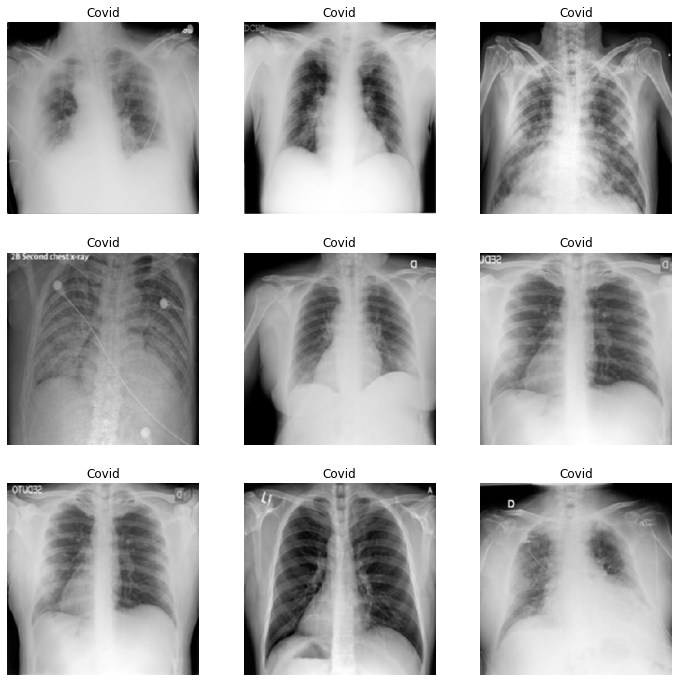

In [29]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_dataset.next()
    plt.imshow(img[0], cmap='gray')
    dic = {0:'Covid', 1:'Normal', 2:'Viral Pneumonia'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

In [30]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(256,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(3,activation = 'softmax')
                                   ])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)      

In [32]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [33]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 101,
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
101/101 [==============================] - 220s 2s/step - loss: 1.7933 - accuracy: 0.4437 - val_loss: 0.7554 - val_accuracy: 0.6062
Epoch 2/20
101/101 [==============================] - 218s 2s/step - loss: 0.6967 - accuracy: 0.6595 - val_loss: 0.9678 - val_accuracy: 0.6481
Epoch 3/20
101/101 [==============================] - 218s 2s/step - loss: 0.6658 - accuracy: 0.6868 - val_loss: 0.7103 - val_accuracy: 0.6432
Epoch 4/20
101/101 [==============================] - 219s 2s/step - loss: 0.5760 - accuracy: 0.7448 - val_loss: 0.3862 - val_accuracy: 0.8259
Epoch 5/20
101/101 [==============================] - 218s 2s/step - loss: 0.5680 - accuracy: 0.7761 - val_loss: 0.3651 - val_accuracy: 0.8309
Epoch 6/20
101/101 [==============================] - 219s 2s/step - loss: 0.4850 - accuracy: 0.7935 - val_loss: 0.3740 - val_accuracy: 0.8148
Epoch 7/20
101/101 [==============================] - 218s 2s/step - loss: 0.4724 - accuracy: 0.8115 - val_loss: 0.3235 - val_accuracy: 0.8667

In [46]:
model.evaluate(validation_dataset)

26/26 [==============================] - 12s 455ms/step - loss: 0.4761 - accuracy: 0.9025


[0.4760770797729492, 0.9024691581726074]

In [47]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()

In [34]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    print(i)

COVID-1001.png
COVID-1002.png
COVID-1003.png
COVID-1004.png
COVID-1005.png
COVID-1006.png
COVID-1007.png
COVID-1008.png
COVID-1009.png
COVID-1010.png
COVID-1011.png
COVID-1012.png
Normal-1001.png
Normal-1002.png
Normal-1003.png
Normal-1004.png
Normal-1005.png
Normal-1006.png
Normal-1007.png
Normal-1008.png
Normal-1009.png
Normal-1010.png
Normal-1011.png
Normal-1012.png
Viral Pneumonia-1001.png
Viral Pneumonia-1002.png
Viral Pneumonia-1003.png
Viral Pneumonia-1004.png
Viral Pneumonia-1005.png
Viral Pneumonia-1006.png
Viral Pneumonia-1007.png
Viral Pneumonia-1008.png
Viral Pneumonia-1009.png
Viral Pneumonia-1010.png
Viral Pneumonia-1011.png
Viral Pneumonia-1012.png


In [35]:
predictions = model.predict(x=validation_dataset, verbose=0)

In [36]:
for i in predictions:
    print(i)

[1.0000000e+00 0.0000000e+00 2.5637715e-36]
[0.95411426 0.03438411 0.01150168]
[9.9999821e-01 4.8866610e-07 1.3241569e-06]
[1.0000000e+00 4.0387234e-35 4.1080503e-30]
[9.9866009e-01 1.3156447e-03 2.4302733e-05]
[1.0970997e-04 8.1401253e-05 9.9980897e-01]
[9.9995661e-01 2.0982987e-05 2.2441838e-05]
[8.3848953e-01 1.6090360e-01 6.0696749e-04]
[1.3547248e-01 8.6452627e-01 1.2502467e-06]
[9.9995804e-01 9.2434425e-07 4.1051382e-05]
[9.9999821e-01 1.1189538e-08 1.7491710e-06]
[1.0000000e+00 1.8917456e-09 1.8918973e-09]
[0.9977494  0.00117538 0.00107525]
[9.99118626e-01 8.68979783e-04 1.23449345e-05]
[9.9950910e-01 2.8798118e-04 2.0289735e-04]
[9.9999928e-01 2.6541827e-07 4.8106438e-07]
[9.9999964e-01 4.1457540e-07 5.8604922e-08]
[9.9947625e-01 1.8268331e-07 5.2350177e-04]
[9.9932778e-01 2.5968687e-04 4.1251275e-04]
[0.9658422  0.03308949 0.00106841]
[9.6878850e-01 1.5007064e-04 3.1061476e-02]
[9.998191e-01 1.710258e-04 9.848643e-06]
[9.999027e-01 6.147920e-05 3.581238e-05]
[9.9999833e-01 1.6

In [37]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [38]:
#pred = [1 * (x[0]>=0.5) for x in preds_sigmoid]
#rounded_predictions = [1*(x[0]>=0.5) for x in predictions]

In [39]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
2
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
2
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
0
2
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
1
0
0
1
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
2
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
2
0
0
0
2
0
0
1
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1


Confusion Matrix

In [40]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [41]:
cm = confusion_matrix(y_true=validation_dataset.classes, y_pred=rounded_predictions)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[231  23  16]
 [ 42 227   1]
 [  0   0 270]]


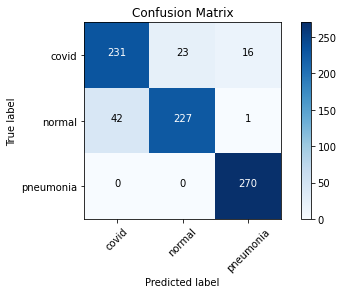

In [43]:
cm_plot_labels = ['covid', 'normal', 'pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [50]:
labels = ['covid', 'normal', 'pneumonia']
report = classification_report(validation_dataset.classes, rounded_predictions, target_names=labels)
print(report)

              precision    recall  f1-score   support

       covid       0.85      0.86      0.85       270
      normal       0.91      0.84      0.87       270
   pneumonia       0.94      1.00      0.97       270

    accuracy                           0.90       810
   macro avg       0.90      0.90      0.90       810
weighted avg       0.90      0.90      0.90       810

